## Outline
First, we will install Python using Conda.  
 - 1. Installation.  


Then we will follow these helpful guides created by Ryan Abernathey and Kerry Key:
 - [2. Introduction to Python](https://rabernat.github.io/research_computing/intro-to-python.html).  
 - [3. Intermediate Python I: NumPy arrays and matplotlib](https://rabernat.github.io/research_computing/numpy-arrays-and-matplotlib.html).  
 - [4. Intermediate Python II: Pandas for Tabular Data](https://rabernat.github.io/research_computing/pandas.html).  
 - [5. Intermediate Python III: Xarray for Multidimensional Data](https://rabernat.github.io/research_computing/xarray.html).  

Then we will apply these to an example WRFChem dataset:
 - **6. Analyse WRFChem output.**  

[Here](https://github.com/koldunovn/python_for_geosciences) is another useful set of guides.  

## 6. Analyse WRFChem output

In [1]:
# import the required libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

In [2]:
# open the data set
ds = xr.open_dataset('/nfs/a68/earlacoa/shared/wrfout_2015_PM2_5_DRY_annual_mean_0.25deg.nc')
print(ds)

<xarray.Dataset>
Dimensions:    (lat: 580, lon: 1440)
Coordinates:
  * lon        (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat        (lat) float64 -60.0 -59.75 -59.5 -59.25 ... 84.0 84.25 84.5 84.75
Data variables:
    PM2_5_DRY  (lat, lon) float64 ...


In [3]:
# extract the data arrays
pm25 = ds['PM2_5_DRY']
lon = ds.lon.values
lat = ds.lat.values
    
# create 2d latitude and longitude arrays for plotting
xx, yy = np.meshgrid(lon, lat)

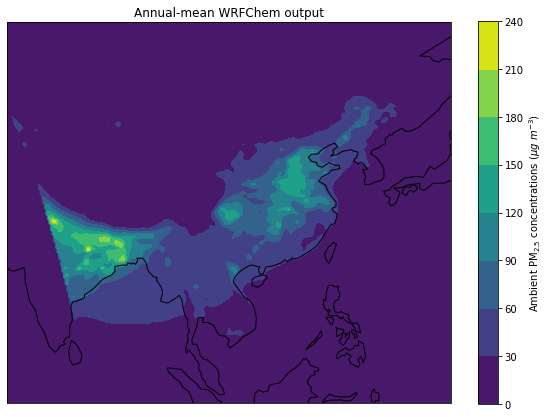

In [4]:
# create a plot
fig = plt.figure(1, figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax.set_extent([70, 140, 0, 60], crs=ccrs.PlateCarree())
ax.coastlines()
im = ax.contourf(xx, yy, pm25, transform=ccrs.PlateCarree())
fig.colorbar(im, label='Ambient PM$_{2.5}$ concentrations (${\mu}g$ $m^{-3}$)', shrink=0.69)
plt.title('Annual-mean WRFChem output')

plt.tight_layout()
plt.show()